## Generating sample paths

### Standard Brownian motion

The standard one-dimensional Brownian motion $W_t$ for $0 \leq t \leq T$ satisfies the following:

- $W_0 = 0$ and has continuous sample paths
- For each $t, s > 0, W_{t+s} - W_{t} \sim \mathcal{N}(0, s)$ (stationary increments)
- For each $t, s > 0, W_{t+s} - W_{t}$ is independent to $\mathcal{N}(0, s)$ (independent increments)

Simulating the standard Brownian motion proceeds by discretising $T$ into $n$ points to get $0 = t_1 < t_2 < ... < t_n = T$ which allows us to generate $\left(W_{t_1}, \ldots, W_{t_n}\right)$.

Letting $W_0 = 0$, the subsequent values are generated as follows:
$$W_{t_{i+1}}:=W_{t_{i}}+\sqrt{t_{i+1}-t_i} Z_{i+1}, \quad i=0, \ldots, n-1 .$$
where $Z_1, \ldots, Z_n$ are independent standard normal random variables.

Correspondingly, the standard vectorised procedure in Python is to create
1. The initial value vector $[\mathbf{W}_0]$
2. The remaining $n-1$ steps vector $[\mathbf{W}_{t_2}, \mathbf{W}_{t_3}, ..., \mathbf{W}_T]$

and concatenate them.

In [4]:
import numpy as np

# Specify number of paths to generate
PATHS = 5

# Define T and number of points
n, T = 1000, 1
t = np.linspace(start = 0,
                stop = T,
                num = n)

dt = T/(n-1)

W_0 = np.zeros((PATHS, 1))
dW = np.random.normal(loc = 0,
                      scale = np.sqrt(dt),
                      size = (PATHS, n-1))

W_rest = np.cumsum(dW, axis=1)

W = np.concatenate((W_0, W_rest), axis=1)

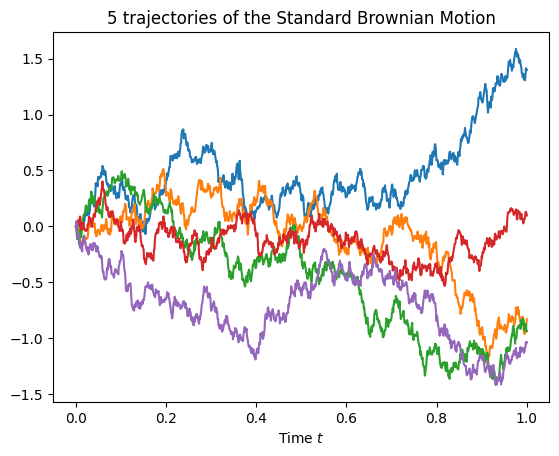

In [5]:
import matplotlib.pyplot as plt

def plot_trajectories(paths, title=None):

    # Generate up to 5 paths
    for p in paths[:5]:
        plt.plot(t, p)

    plt.xlabel('Time $t$')
    if title:
        plt.title(f'{len(paths[:5])} trajectories of the {title}')

plot_trajectories(W, 'Standard Brownian Motion')

### Brownian Motion with drift and diffusion

For constants $\mu$ and $\sigma >0$ and standard Brownian motion $W_t$, we can define a Brownian motion $X$ with drift $\mu$ and diffusion coefficient $\sigma^2$ such that 
$X_t = \mu t + \sigma W_t$.

This is denoted by $X \sim \text{BM} (\mu, \sigma^2)$ and it follows that $X_t \sim \mathcal{N} (\mu t, \sigma^2 t)$.
$X$ solves the SDE
$$dX_t = \mu dt + \sigma dW_t$$

Similar to the above, we assign some value $X_0$ to generate the subsequent values:
$$X_{t_{i+1}}:=X_{t_{i}}+\mu\left(t_{i+1}-t_i\right)+\sigma \sqrt{t_{i+1}-t_i} Z_{i+1}, \quad i=0, \ldots, n-1 $$

In [6]:
mu, sigma = 1, 0.5

# Set X_0 = 0
X_0 = np.full((PATHS, 1), 0)

dX = np.random.normal(loc = mu * dt,
                      scale = sigma * np.sqrt(dt),
                      size = (PATHS, n-1))

X_rest = np.cumsum(dX, axis=1)

X = np.concatenate((X_0, X_rest), axis=1)

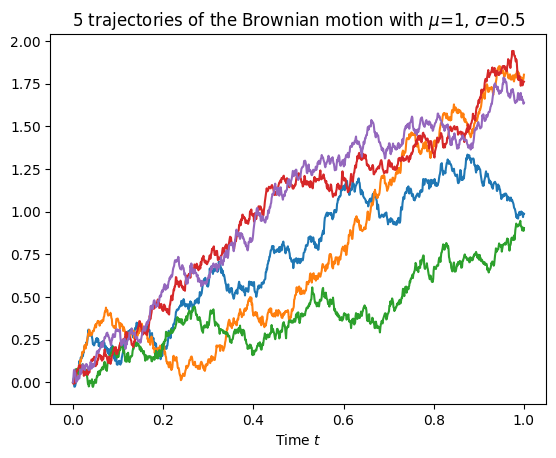

In [7]:
plot_trajectories(X, f'Brownian motion with $\mu$={mu}, $\sigma$={sigma}')

### Geometric Brownian motion with drift and diffusion

The GBM $S_t$ is often specified by the process satisfying the SDE
$$d S_t =\mu S_t d t+\sigma S_t d W_t$$
This is denoted as $S \sim \text{GBM} (\mu, \sigma^2)$ where $\mu$ and $\sigma$ are referred to as the *drift* and *volatility* parameters respectively.
The solution to the SDE can be shown to be
$$S_t = S_0 e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t}$$
Moreover, for any $s < t$,
$$S_t = S_s e^{(\mu - \frac{\sigma^2}{2})(t-s) + \sigma (W_t - W_s)}$$
which provides a recursive procedure for simulating values:
$$S_{t_{i+1}}:=S_{t_{i}} e^{\left(\mu-\frac{1}{2} \sigma^2\right)\left(t_{i+1}-t_i\right)+\sigma \sqrt{t_{i+1}-t_i} Z_{i+1}}, \quad i=0, \ldots, n-1 $$

In [8]:
mu, sigma = 1, 0.5

# Set S_0 = 1
S_0 = np.full((PATHS, 1), 1)

# Create increments in the exponent
dX = np.random.normal(loc = (mu - sigma**2 / 2) * dt,
                      scale = sigma * np.sqrt(dt),
                      size = (PATHS, n-1))

S_rest = np.exp(np.cumsum(dX, axis=1))

S = np.concatenate((S_0, S_rest), axis=1)

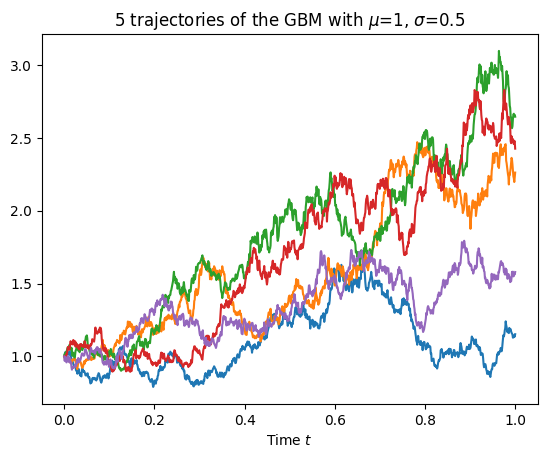

In [9]:
plot_trajectories(S, f'GBM with $\mu$={mu}, $\sigma$={sigma}')

### Gaussian short rate models

The Vasicek interest model describes the short rate $r_t$ as the solution to the Ornstein-Ubleck SDE

$$d r_t=\alpha(b-r_t) d t+\sigma d W_t$$

for the standard BM $W_t$ and constants $\alpha, \sigma$ and $b$

<!-- General solution is 
$$
r(t)=e^{-\alpha t} r(0)+\alpha \int_0^t e^{-\alpha(t-s)} b(s) d s+\sigma \int_0^t e^{-\alpha(t-s)} d W(s) .
$$ -->


<!-- Similarly, for any $0<u<t$,

$$
r(t)=e^{-\alpha(t-u)} r(u)+\alpha \int_u^t e^{-\alpha(t-s)} b(s) d s+\sigma \int_u^t e^{-\alpha(t-s)} d W(s) .
$$ -->

---

Constant $b$

$$r\left(t_{i+1}\right):=e^{-\alpha\left(t_{i+1}-t_i\right)} r\left(t_i\right)+b\left(1-e^{-\alpha\left(t_{i+1}-t_i\right)}\right)+\sigma \sqrt{\frac{1}{2 \alpha}\left(1-e^{-2 \alpha\left(t_{i+1}-t_i\right)}\right)} Z_{i+1}$$

Euler Scheme



- $\alpha$: Speed of mean reversion
- $b$: Long-term mean interest rate
- 

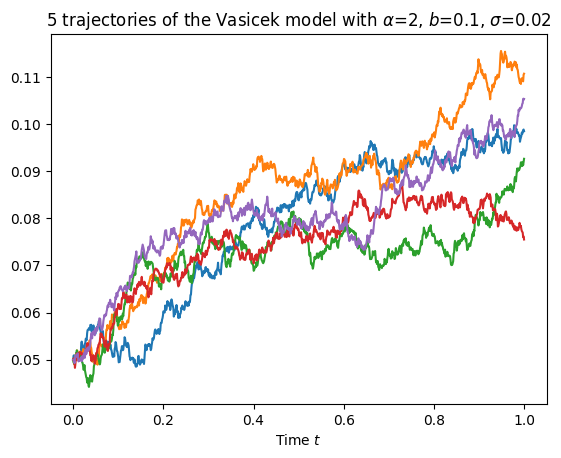

In [10]:
alpha = 2 # Speed of mean reversion
b = 0.10  # Long-term mean interest rate (5%)
sigma = 0.02  # Volatility of the random component (2%)

r_0 = np.full((PATHS, 1), 0.05)

r = np.concatenate((r_0, np.zeros((PATHS, n-1))), axis=1)

factor = np.exp(-alpha*dt)
for col in range(1, n):
    r[:, col] += factor*r[:, col-1] + np.random.normal(loc = b * (1-factor),
                                                       scale = sigma * np.sqrt(0.5 / alpha * (1 - np.exp(-2*alpha*dt))),
                                                       size = PATHS)

plot_trajectories(r, fr'Vasicek model with $\alpha$={alpha}, $b$={b}, $\sigma$={sigma}')

## 2. Stock process

### 2.1. Black-Scholes model

The class `GBM` below implements the stock process (geometric Brownian motion) as in (1).

In [11]:
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt

class GBM():

    # Initialise GBM model
    def __init__(self, S_0, r, sigma, T, steps):
        self.S_0 = S_0        
        self.r = r          
        self.sigma = sigma  
        self.T = T
        self.steps = steps
        self.dt = T/(steps-1)

    # Generate N paths
    def generate_paths(self, n_paths):

        X_0 = np.zeros((n_paths, 1))
        r, sigma, dt = self.r, self.sigma, self.dt

        # Create normal increments in the exponent
        dW = norm.rvs(loc = (r - sigma**2 / 2) * dt,
                      scale = np.sqrt(dt) * sigma,
                      size = (n_paths, self.steps - 1))

        # Multiply by spot price
        X = np.concatenate((X_0, dW), axis=1).cumsum(1)

        return self.S_0 * np.exp(X)

In [ ]:
np.random.seed(0)

S_0 = 100.0  # spot stock price
T = 1  # maturity
r = 0.1  # risk free rate
sigma = 0.2  # diffusion coefficient or volatility

n_steps = 10000 # number of steps

S = GBM(S_0, r, sigma, T, n_steps)

In [248]:
mu, sigma = 1, 0.5

# Set S_0 = 1
S_0 = np.full((PATHS, 1), 1)

# Create increments in the exponent
dX = np.random.normal(loc = (mu - sigma**2 / 2) * dt,
                      scale = sigma * np.sqrt(dt),
                      size = (PATHS, n-1))

S_rest = np.exp(np.cumsum(dX, axis=1))

S = np.concatenate((S_0, S_rest), axis=1)

### 2.2 Jump-Diffusion models

Jump-diffusion models incorporates both continuous price changes and sudden/discontinuous jumps that occur randomly over time and is governed by the following SDE
$$d S_t = \underbrace{\mu S_t d t+\sigma S_t d W_t}_{\text{(1) continuous part}} + \underbrace{S_{t-} d J_t}_{\text{(2) jump part}}$$
where $S_{t-}$ is the value of the process just before the jump occurs. The jump part is a stochastic integral with respect to the Poisson process $N$ and the random variable $Y_j$ which represents the size of the jump.

The newly appearing $J_t$ term is a compound Poisson process that models the jumps. It is defined as
$$J_t = \sum_{j=1}^{N(t)} Y_j,$$
where $N_t$ is a Poisson (counting) process with some intensity $\lambda$ and $Y_j$ are IID random variables that are independent of $N$ and $W$. In Merton's Jump-Diffusion model (1976), jumps follow a log-normal distribution i.e. $\ln (Y_j) \sim \mathcal{N}(a, b^2)$. The solution to the SDE is given by
$$S_t = S_0 e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t} \prod_{j=1}^{N(t)} Y_j = S_0 e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t + \sum_{j=1}^{N(t)} \ln (Y_j)}$$
If we assume that $ \ln (Y_j) \sim \mathcal{N}(a, b^2)$. Then
$$ \sum_{j=1}^{N_t} \ln (Y_j) \sim \mathcal{N}(aN_t, b^2 N_t) = a N_t +  b\sqrt{N_t} \mathcal{N}(0, 1),$$
which provides a recursive procedure for simulating values,

$$S_{t_{i+1}}:=S_{t_{i}} e^{\left(\mu-\frac{1}{2} \sigma^2\right)\left(t_{i+1}-t_i\right)+\sigma \sqrt{t_{i+1}-t_i} Z_{i+1} + M}, \quad i=0, \ldots, n-1 $$
$$M :=a N+b \sqrt{N} Z.$$

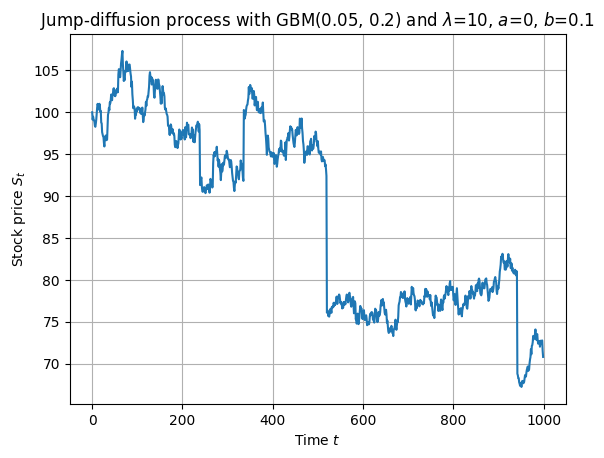

In [275]:
S_0 = 100
T = 1  # maturity
mu = 0.05
sigma = 0.2  # diffusion coefficient or volatility

intensity = 10
a, b = 0, 0.1

# Get the continuous part
dX = np.random.normal(loc = (mu - sigma**2 / 2) * dt,
                      scale = sigma * np.sqrt(dt),
                      size = n-1) 

# Get the number of jumps at each Δt
dN = np.random.poisson(lam=intensity*dt, size=n-1)

# Get the jump sizes at each Δt
dM = a * dN + b * np.sqrt(dN) * np.random.normal(size=n-1)

# Add the jumps to the continuous part
dX += dM

# Insert 0 at the beginning of the array
S = S_0 * np.exp(np.insert(np.cumsum(dX), 0, 0))

plt.title(f'Jump-diffusion process with GBM({mu}, {sigma}) and $\lambda$={intensity}, $a$={a}, $b$={b}')
plt.xlabel('Time $t$')
plt.ylabel('Stock price $S_t$')
plt.grid(True)
_ = plt.plot(S)